## Accelerometer and facial expressions emotion estimation
 

Do NOT run click "Run All"!

In [8]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from analyzer import Analyzer
plt.rcParams['figure.figsize'] = [20, 10]

### Dataset reading (saved by logger)

In [9]:
calm = []
for file in os.listdir("dataset/calm"):
    if file.endswith(".npy"):
        recording = np.load("dataset/calm/" + file, allow_pickle=True)
        calm.append(recording)

rage = []
for file in os.listdir("dataset/rage"):
    if file.endswith(".npy"):
        recording = np.load("dataset/rage/" + file, allow_pickle=True)
        rage.append(recording)


dataset = np.concatenate((calm, rage))

### Analyzer initialization (may require downloads for the first time)

In [3]:
# Select faces=False for accelerometer-only use
analyzer = Analyzer("clf.obj", faces=True)

# Demos


### Live face analysis demo

In [ ]:
while True:
    face_score = analyzer.analyze_face_average(times=3)
    acc_percentage_summary, details = analyzer.analyze(dataset[12])

    if face_score is not None:
        print("Gamepad score: ", acc_percentage_summary, " Face score: ", face_score)
    else:
        print("Gamepad score: ", acc_percentage_summary)

### Gamepad accelerometer demo

ValueError: setting an array element with a sequence.

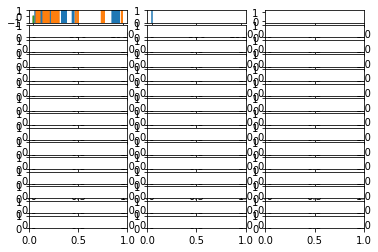

In [11]:
fig, axes = plt.subplots(len(dataset), 3)

for i in range(len(rage)):
    
    rms = analyzer.corrected_rms_3dim(dataset[i])
    y, _ = analyzer.analyze(dataset[i])

    axes[i,0].set_ylim([-1,1])
    axes[i,1].set_ylim([0,1])
    axes[i,2].set_ylim([-0.2,1.2])
    axes[i,0].plot(dataset[i])
    axes[i,1].plot(rms)
    axes[i,2].plot(y)
   



